# House Price Prediction
> Predicting the house price

<img src="https://storage.googleapis.com/kaggle-datasets-images/46927/85201/9bce2258091287516e5ed9425f7316cf/dataset-cover.jpg?t=2018-08-26-07-48-15" width='1000' height='400'>


---

### 👨‍💻 **Author: Abdul Samad**

- 🔗 **LinkedIn:**  
  [https://www.linkedin.com/in/abdulsamad577/](https://www.linkedin.com/in/abdulsamad577/)
  
- 🧠 **Kaggle Profile:**  
  [https://www.kaggle.com/samad0015](https://www.kaggle.com/samad0015)

---




# About Dataset
### Context
The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

## Import Libraries

In [307]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [266]:
df=pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Explore the Data (EDA)

In [267]:
df.shape

(4600, 18)

In [268]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Check the Missing Values

In [270]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

> So there are nothing presence of any missing values in our dataset.

## Preprocessing

#### Deal with the Categorical Columns:

#### City Column

In [271]:
df['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [272]:
le_city=LabelEncoder()
df['city']=le_city.fit_transform(df[['city']])

In [273]:
df['city'].value_counts().nlargest(5)

city
35    1573
32     293
3      286
31     235
16     187
Name: count, dtype: int64

#### Street Column

In [274]:
df['street'].head()

0        18810 Densmore Ave N
1             709 W Blaine St
2    26206-26214 143rd Ave SE
3             857 170th Pl NE
4           9105 170th Ave NE
Name: street, dtype: object

In [275]:
df['street'].value_counts()

street
2520 Mulberry Walk NE                             4
2500 Mulberry Walk NE                             3
9413 34th Ave SW                                  2
6008 8th Ave NE                                   2
11034 NE 26th Pl                                  2
14583 NE 58th St                                  2
8430 8th Ave SW                                   2
5010 Greenwood Ave N                              2
22840 SE 269th St                                 2
3510 S Holly St                                   2
13800 453rd Ave SE                                2
35229 SE Terrace St                               2
13516 164th Ave SE                                2
2803 SW Bataan St                                 2
611 N 46th St                                     2
323 25th Ave S                                    2
106 24th Ave E                                    2
1018 NE 96th St                                   2
4313 SW Willow St                                 2
1273 

> There are 4525 different Streets. so it is unneccessay data.

In [276]:
df.drop(columns='street',inplace=True)

#### date column

In [277]:
df['date']=pd.to_datetime(df['date'])

In [278]:
df['date'].value_counts()

date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2014-07-09    121
2014-06-24    120
2014-07-01    116
2014-05-20    116
2014-06-17    113
2014-05-28    111
2014-06-20    107
2014-05-27    104
2014-06-03    104
2014-06-19    101
2014-06-04    100
2014-06-18     99
2014-06-10     98
2014-06-16     97
2014-06-09     95
2014-05-21     94
2014-06-05     93
2014-05-07     93
2014-06-27     92
2014-06-12     90
2014-06-11     90
2014-05-22     90
2014-07-02     90
2014-05-13     86
2014-05-23     85
2014-05-05     84
2014-05-06     83
2014-05-19     83
2014-07-07     83
2014-05-15     82
2014-05-08     81
2014-05-09     81
2014-05-14     81
2014-05-12     80
2014-06-13     79
2014-06-02     78
2014-06-30     76
2014-05-29     75
2014-07-03     74
2014-05-16     73
2014-05-02     67
2014-06-06     67
2014-05-30     65
2014-07-10     31
2014-06-28     13
2014-06-22     12
2014-05-24     11
2014-06-08     10
2014-05-26      8
2014-06-21      8
2014-06-14      8
2014-

#### StateZip Column

In [279]:
df['statezip'].head()

0    WA 98133
1    WA 98119
2    WA 98042
3    WA 98008
4    WA 98052
Name: statezip, dtype: object

In [280]:
df['statezip'].value_counts().nlargest(20)

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
WA 98059    106
WA 98042    100
WA 98034     99
WA 98053     98
WA 98074     98
WA 98038     96
WA 98027     95
WA 98023     95
WA 98058     95
WA 98133     93
WA 98125     89
WA 98033     89
WA 98029     88
WA 98155     88
WA 98040     86
Name: count, dtype: int64

>  We can make it into Numerical if remove the 'WA'.

In [281]:
# Example Series or DataFrame column
df['statezip'] = df['statezip'].str.replace('WA ', '').astype(int)


In [282]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4600,2014-06-07 03:14:42.782608640,2014-05-02 00:00:00,2014-05-21 00:00:00,2014-06-09 00:00:00,2014-06-24 00:00:00,2014-07-10 00:00:00,NaN
price,4600.0,551962.988473,0.0,322875.0,460943.461539,654962.5,26590000.0,563834.702547
bedrooms,4600.0,3.40087,0.0,3.0,3.0,4.0,9.0,0.908848
bathrooms,4600.0,2.160815,0.0,1.75,2.25,2.5,8.0,0.783781
sqft_living,4600.0,2139.346957,370.0,1460.0,1980.0,2620.0,13540.0,963.206916
sqft_lot,4600.0,14852.516087,638.0,5000.75,7683.0,11001.25,1074218.0,35884.436145
floors,4600.0,1.512065,1.0,1.0,1.5,2.0,3.5,0.538288
waterfront,4600.0,0.007174,0.0,0.0,0.0,0.0,1.0,0.084404
view,4600.0,0.240652,0.0,0.0,0.0,0.0,4.0,0.778405
condition,4600.0,3.451739,1.0,3.0,3.0,4.0,5.0,0.67723


#### Country Column

In [283]:
df['country'].head()

0    USA
1    USA
2    USA
3    USA
4    USA
Name: country, dtype: object

In [284]:
df.country.value_counts()

country
USA    4600
Name: count, dtype: int64

> All data belongs to the USA country. So it is unnecessary for us.

>  But Check the correlation so i will encode it otherwise it is necessary to remove this column from the dataset.

In [285]:
df['country']=LabelEncoder().fit_transform(df[['country']])

### Check the Correlation of the data

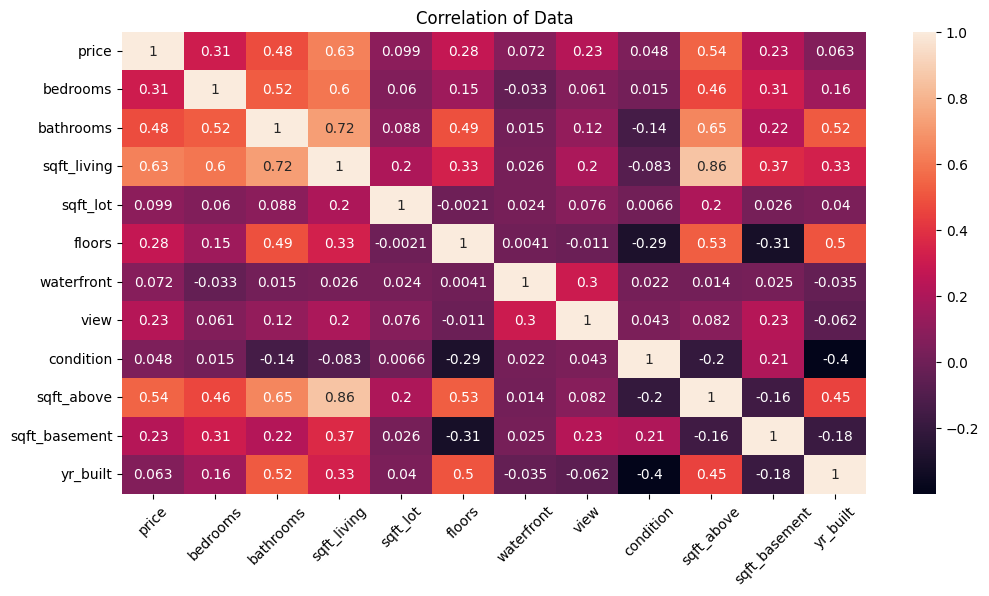

In [316]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation of Data")
plt.xticks(rotation=45)
plt.show()

According to the Correlation Heatmap we observed that the Columns (country, city, statezip, yr_renovated and date) does not make any sense with price.


So i will remove these columns for preparation the data for machine learning.

In [287]:
df=df.drop(columns=['date','city','statezip','country','yr_renovated'])

##### Normalize the Price Column

<Axes: ylabel='price'>

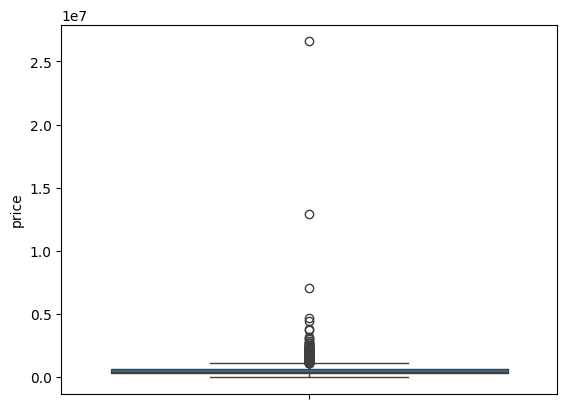

In [288]:
sns.boxplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

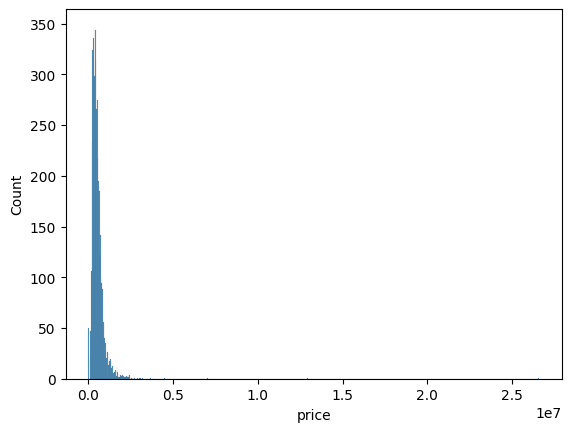

In [289]:
sns.histplot(df['price'])

#### There are outliers present in this column, which distort the distribution and do not represent the data accurately.

Removing the Outliers...

In [290]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


Again Check the distribution of Data

<Axes: xlabel='price', ylabel='Count'>

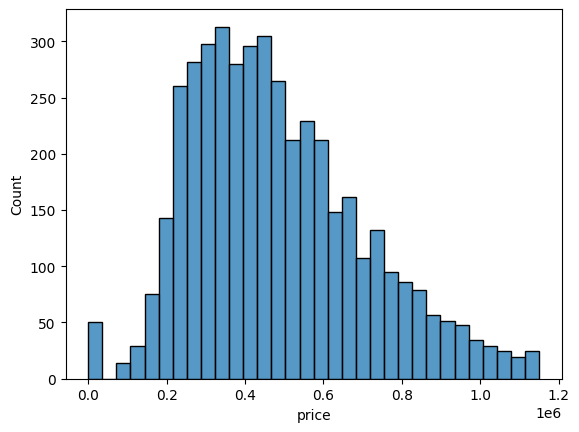

In [291]:
sns.histplot(df['price'])

#### Scatter plot showing the relationship between house price and square footage of the living area. This plot helps visualize how the size of a house impacts its price: 

<Axes: xlabel='price', ylabel='sqft_living'>

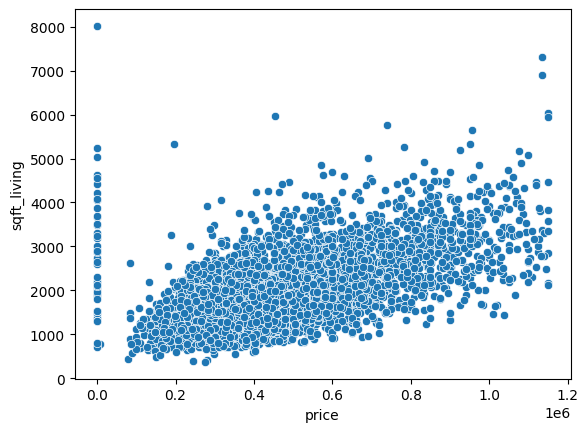

In [292]:
sns.scatterplot(df,x='price',y='sqft_living')

In [293]:
df[df['price']==0].head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013


> ##### As we know, it is impossible for the price of a house to be zero. A price of zero is unrealistic and doesn't reflect the true market value, which is why we must account for such anomalies in the dataset, either by removing them to ensure model accuracy.

In [294]:
df = df[df['price'] != 0]


<Axes: xlabel='sqft_living', ylabel='Count'>

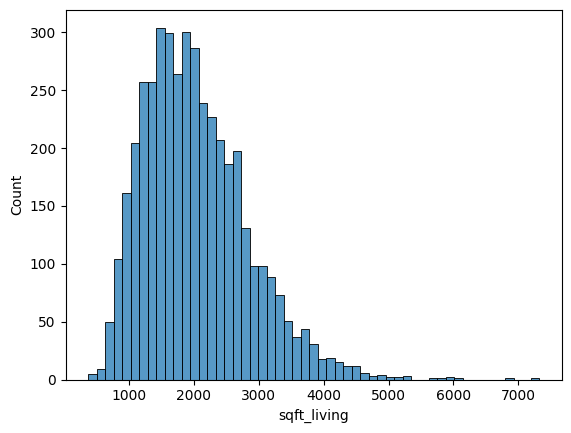

In [301]:
sns.histplot(df['sqft_living'])

 #### Plot the Trend line Price vs Sqft Living:

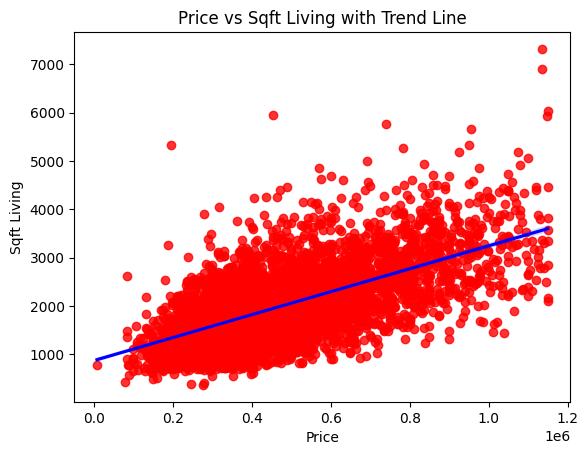

In [ ]:
sns.regplot(data=df, x='price', y='sqft_living', scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Price vs Sqft Living with Trend Line')
plt.xlabel('Price')
plt.ylabel('Sqft Living')
plt.show()


In [295]:
df.shape

(4311, 12)

In [296]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938


>The dataset has now been preprocessed and is ready for use in Machine Learning models.

## Split the Data

In [297]:
X=df.drop(columns='price')
y=df['price']

In [298]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

### Check the 10 different Models to Select a Best Model:

In [317]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("LinearRegression")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=Ridge(alpha=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Ridge')
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=Lasso(alpha=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Lasso")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=ElasticNet()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("ElasticNet ")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=SVR()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("SVR")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("DecisionTreeRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("RandomForestRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("KNN")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Evaluation
print("GradientBoostingRegressor")
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("XGBRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

LinearRegression
MAE:  121785.4119510738
MSE: 23939066976.95079
R2 Score:  0.4820916955107222
---------
Ridge
MAE:  121784.19975787646
MSE: 23938718060.215282
R2 Score:  0.48209924412884786
---------
Lasso
MAE:  121785.36638825921
MSE: 23939053047.177513
R2 Score:  0.4820919968735641
---------
ElasticNet 
MAE:  124793.438237037
MSE: 24820798264.570683
R2 Score:  0.46301593300811295
---------
SVR
MAE:  169256.86944643443
MSE: 47982402409.06643
R2 Score:  -0.03807239859968581
---------
DecisionTreeRegressor
MAE:  157897.841015635
MSE: 42995916958.28001
R2 Score:  0.06980742092977998
---------
RandomForestRegressor
MAE:  119164.32063003193
MSE: 23677448890.306633
R2 Score:  0.487751656268928
---------
KNN
MAE:  134520.3737298663
MSE: 30248102029.96184
R2 Score:  0.34559925616818554
---------
GradientBoostingRegressor
MAE:  116421.73521468189
MSE: 22271451040.612507
R2 Score:  0.5181696321721563
---------
XGBRegressor
MAE:  121960.18385536152
MSE: 25914742621.011806
R2 Score:  0.4393490596

> ##### According to the results of the 10 models above, Linear Regression showed the best and most reliable performance.

## Build the Final Model

In [308]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [309]:
# Prediction of Model
y_pred=model.predict(X_test)

## Evaluation of the Model

In [310]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)

MAE:  116523.5734060982
MSE: 22305419919.543156
R2 Score:  0.5174347345042851


>#### Summary:
The model predicts house prices with an MAE of $116,523, MSE of 22.3B, and an R² score of 0.517, indicating it explains about 51.7% of the variance in prices. Performance is decent, but further improvement is possible.

#### Comparison of Actual vs. Predicted House Prices:

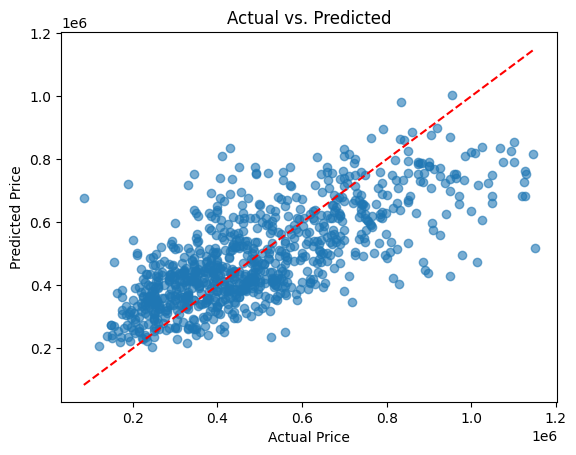

In [312]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted')
plt.show()



## Save the Model

In [313]:
import pickle
with open('house_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)
